In [375]:
import numpy as np
import os
import librosa
import keras
import pandas as pd
import time
import matplotlib.pyplot as plt
import math
from IPython.display import Audio, clear_output

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [282]:
df_tp = pd.read_csv('/home/birdsong/kaggle-data/train_tp.csv')
df_fp = pd.read_csv('/home/birdsong/kaggle-data/train_fp.csv')

In [291]:
spectrograms = pd.read_csv('/home/birdsong/processed_data/spectrograms/spectrograms.csv').values
labels = pd.read_csv('/home/birdsong/processed_data/spectrograms/labels.csv').values[:,1]
#labels = np.concatenate((labels, np.full(7781, -1, dtype = int)))
probabilities = pd.read_csv('/home/birdsong/processed_data/spectrograms/probabilities.csv').values

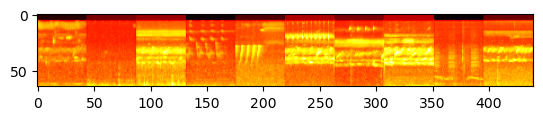

In [292]:
# the first 10 true positive spectrograms
plt.imshow(spectrograms[0:10,1:].reshape(-1,64,44).transpose((1,0,2)).reshape(64,-1)[::-1,:], cmap = 'hot')
plt.show()

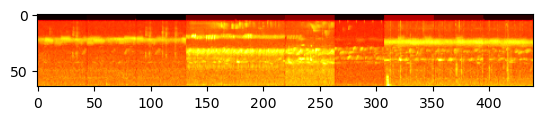

In [293]:
# the first 10 false positive spectrograms
plt.imshow(spectrograms[1216:1226,1:].reshape(-1,64,44).transpose((1,0,2)).reshape(64,-1)[::-1,:], cmap = 'hot')

In [294]:
len(spectrograms[1216:,1:]), len(np.unique(spectrograms[1216:,1:], axis = 0))

(7781, 7781)

In [295]:
len(spectrograms[:1216,1:]), len(np.unique(spectrograms[:1216,1:], axis = 0))

(1216, 1216)

In [311]:
spectrograms.shape

(8997, 2817)

In [297]:
labels.shape

(8997,)

In [301]:
arr0 = np.zeros(7781, dtype=int)
arr1 = np.ones(1216, dtype=int)
tp_or_fp = np.concatenate((arr1, arr0))

In [302]:
# including tp, fp, and indices
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms, labels,
    shuffle=True, test_size = 0.15, random_state = 431,
    stratify = tp_or_fp.reshape(-1,1))

model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 10000))    
])

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

correct_train = np.sum(y_train == y_train_pred)
correct_test = np.sum(y_test == y_test_pred)
print('correctly predicted %d out of %d training samples, %.2f%%' % 
    (correct_train, len(y_train), correct_train/len(y_train)))
print('correctly predicted %d out of %d test samples, %.2f%%' % 
    (correct_test, len(y_test), correct_test/len(y_test)))

correctly predicted 7647 out of 7647 training samples, 1.00%
correctly predicted 1242 out of 1350 test samples, 0.92%


In [303]:
# including tp and fp, but not indices
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms[:,1:], labels,
    shuffle=True, test_size = 0.15, random_state = 431,
    stratify = tp_or_fp.reshape(-1,1))

model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 10000))    
])

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

correct_train = np.sum(y_train == y_train_pred)
correct_test = np.sum(y_test == y_test_pred)
print('correctly predicted %d out of %d training samples, %.2f%%' % 
    (correct_train, len(y_train), correct_train/len(y_train)))
print('correctly predicted %d out of %d test samples, %.2f%%' % 
    (correct_test, len(y_test), correct_test/len(y_test)))

correctly predicted 7647 out of 7647 training samples, 1.00%
correctly predicted 1190 out of 1350 test samples, 0.88%


In [313]:
# only tp
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms[:1216,1:], labels[:1216],
    shuffle=True, test_size = 0.15, random_state = 431)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 10000))    
])

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

correct_train = np.sum(y_train == y_train_pred)
correct_test = np.sum(y_test == y_test_pred)
print('correctly predicted %d out of %d training samples, %.2f%%' % 
    (correct_train, len(y_train), correct_train/len(y_train)))
print('correctly predicted %d out of %d test samples, %.2f%%' % 
    (correct_test, len(y_test), correct_test/len(y_test)))

correctly predicted 1033 out of 1033 training samples, 1.00%
correctly predicted 125 out of 183 test samples, 0.68%


In [371]:
# only tp, predict recording_id
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms[:1216,1:], df_tp.recording_id.values,
    shuffle=True, test_size = 0.15, random_state = 431)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 10000))    
])

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

correct_train = np.sum(y_train == y_train_pred)
correct_test = np.sum(y_test == y_test_pred)
print('correctly predicted %d out of %d training samples, %.2f%%' % 
    (correct_train, len(y_train), correct_train/len(y_train)))
print('correctly predicted %d out of %d test samples, %.2f%%' % 
    (correct_test, len(y_test), correct_test/len(y_test)))

correctly predicted 1033 out of 1033 training samples, 1.00%
correctly predicted 9 out of 183 test samples, 0.05%


In [315]:
model.predict(spectrograms[0:1,1:]), labels[0]

(array([141]), 141)

In [372]:
np.unique(df_tp.recording_id.values)

array(['003bec244', '006ab765f', '007f87ba2', ..., 'ff2eb9ce5',
       'ffb8d8391', 'ffb9a7b9a'], dtype=object)

In [368]:
labels.shape

(8997,)

In [335]:
sig, _ = librosa.load('kaggle-data/train/003bec244.flac')
#spec = librosa.feature.melspectrogram(
#    y=sig, sr=22050, fmin=150, n_fft=512, 
#    hop_length=130, n_mels=80, norm=100.0, power=0.6)
mel_spectrogram = librosa.feature.melspectrogram(
    y = sig, sr = 22050, n_fft = 2048, 
    hop_length = 1024, n_mels = 64,  fmin = 64, fmax = 16384)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

/home/birdsong/.local/lib/python3.11/site-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [340]:
44.544 * 22050 / 1024, 45.1307*22050 / 1024

(959.175, 971.8085302734374)

In [341]:
2*22050/1024

43.06640625

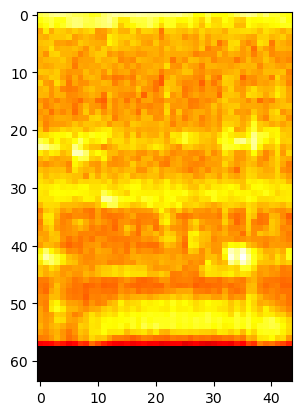

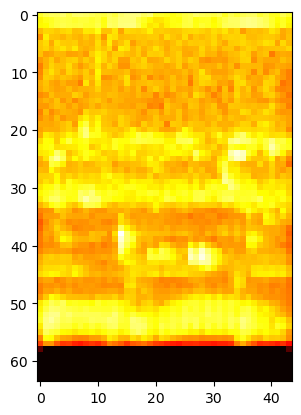

In [364]:
plt.imshow(log_mel_spectrogram[:,1051:1051+44], cmap = 'hot')
plt.show()
plt.imshow(spectrograms[0,1:].reshape(64,44), cmap = 'hot')
plt.show()

In [361]:
predictions = np.array([model.predict(log_mel_spectrogram[:,i:i+44].reshape(-1,64*44))[0] for i in range(0,1000)])

In [363]:
predictions.shape

(1000,)

In [305]:
# including tp and fp, but only check if tp or fp
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms[:,1:], tp_or_fp,
    shuffle=True, test_size = 0.15, random_state = 431,
    stratify = tp_or_fp.reshape(-1,1))

model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 10000))    
])

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

correct_train = np.sum(y_train == y_train_pred)
correct_test = np.sum(y_test == y_test_pred)
print('correctly predicted %d out of %d training samples, %.2f%%' % 
    (correct_train, len(y_train), correct_train/len(y_train)))
print('correctly predicted %d out of %d test samples, %.2f%%' % 
    (correct_test, len(y_test), correct_test/len(y_test)))

correctly predicted 7428 out of 7647 training samples, 0.97%
correctly predicted 1063 out of 1350 test samples, 0.79%


In [308]:
# tying to find duplicate spectra, by first listing ids which belong to the same recording
[cols for id, cols in df_tp.groupby(by = 'recording_id').groups.items() if len(cols) >= 2]

[Int64Index([19, 20], dtype='int64'),
 Int64Index([28, 29], dtype='int64'),
 Int64Index([75, 76], dtype='int64'),
 Int64Index([102, 103], dtype='int64'),
 Int64Index([106, 107], dtype='int64'),
 Int64Index([113, 114, 115], dtype='int64'),
 Int64Index([130, 131], dtype='int64'),
 Int64Index([163, 164], dtype='int64'),
 Int64Index([194, 195], dtype='int64'),
 Int64Index([209, 210], dtype='int64'),
 Int64Index([219, 220], dtype='int64'),
 Int64Index([223, 224, 225], dtype='int64'),
 Int64Index([231, 232, 233], dtype='int64'),
 Int64Index([253, 254], dtype='int64'),
 Int64Index([256, 257], dtype='int64'),
 Int64Index([259, 260], dtype='int64'),
 Int64Index([293, 294, 295], dtype='int64'),
 Int64Index([309, 310, 311, 312], dtype='int64'),
 Int64Index([316, 317], dtype='int64'),
 Int64Index([329, 330], dtype='int64'),
 Int64Index([353, 354], dtype='int64'),
 Int64Index([395, 396], dtype='int64'),
 Int64Index([402, 403], dtype='int64'),
 Int64Index([408, 409], dtype='int64'),
 Int64Index([414

In [309]:
# for example, these indices refer to different parts of the same recording
df_tp.iloc[[19,20,28,29,113,114,115]]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
19,03b96f209,16,4,30.9333,3093.75,32.7680,4593.75
20,03b96f209,16,4,49.6320,3093.75,51.4667,4593.75
28,053aeb7bd,23,4,9.8569,6459.96,17.7807,11627.90
29,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90
113,178b835e3,20,1,36.6453,2343.75,40.0853,5718.75
114,178b835e3,16,4,21.2267,3093.75,23.0613,4593.75
115,178b835e3,16,4,4.2560,3093.75,6.0907,4593.75


In [310]:
# but this shows the corresponding spectrograms are equal
print(np.max(np.abs(spectrograms[19,1:] - spectrograms[20,1:])))
print(np.max(np.abs(spectrograms[28,1:] - spectrograms[29,1:])))
print(np.max(np.abs(spectrograms[113,1:] - spectrograms[114,1:])))
print(np.max(np.abs(spectrograms[114,1:] - spectrograms[115,1:])))

23.511579700000002
36.5523025
29.662994999999995
42.074431059999995


In [378]:
# let's try something else, BirdCLEF
samples = []

for f in os.listdir('BirdCLEF/train_audio/thrnig1/'):
    clear_output(wait = True)
    print('load file %s' % f)
    
    sig,_ = librosa.load('BirdCLEF/train_audio/thrnig1/%s' % f)
    
    target_len = 3*22050
    for i in range(len(sig)//target_len):
sig,sr = librosa.load('BirdCLEF/train_audio/thrnig1/XC110336.ogg')

spec = librosa.feature.melspectrogram(y = sig, sr = sr,
    fmin = 150, n_fft = 512, hop_length = 130, n_mels = 80, norm = 100.0, power = 0.6)        samples.append(sig[i*target_len:(i+1)*target_len])

load file XC315973.ogg


KeyboardInterrupt: 